$\textbf{Lab #3: Asking a statistical question}$

This week we are going to concentrate on asking a statistical question. This process almost always consists of 3+ steps:

    1.) Writing down in words very precisely what question you are trying to ask.

    2.) Translating the precise english question into a mathematical expression. This often includes determining the pdf of the background (possibly including trials), and the to integral to do to obtain a probability.

    3.) Coverting the probability into equivalent sigma

So in this lab we will assume that we know the form of the signal-free background distribution (determining a distribution from data will be next week's lab). In each of our three examples, your task will be to state the statistical question, convert it to math, then perform the associated analyses.

$\textbf{Problem 1}$

In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}



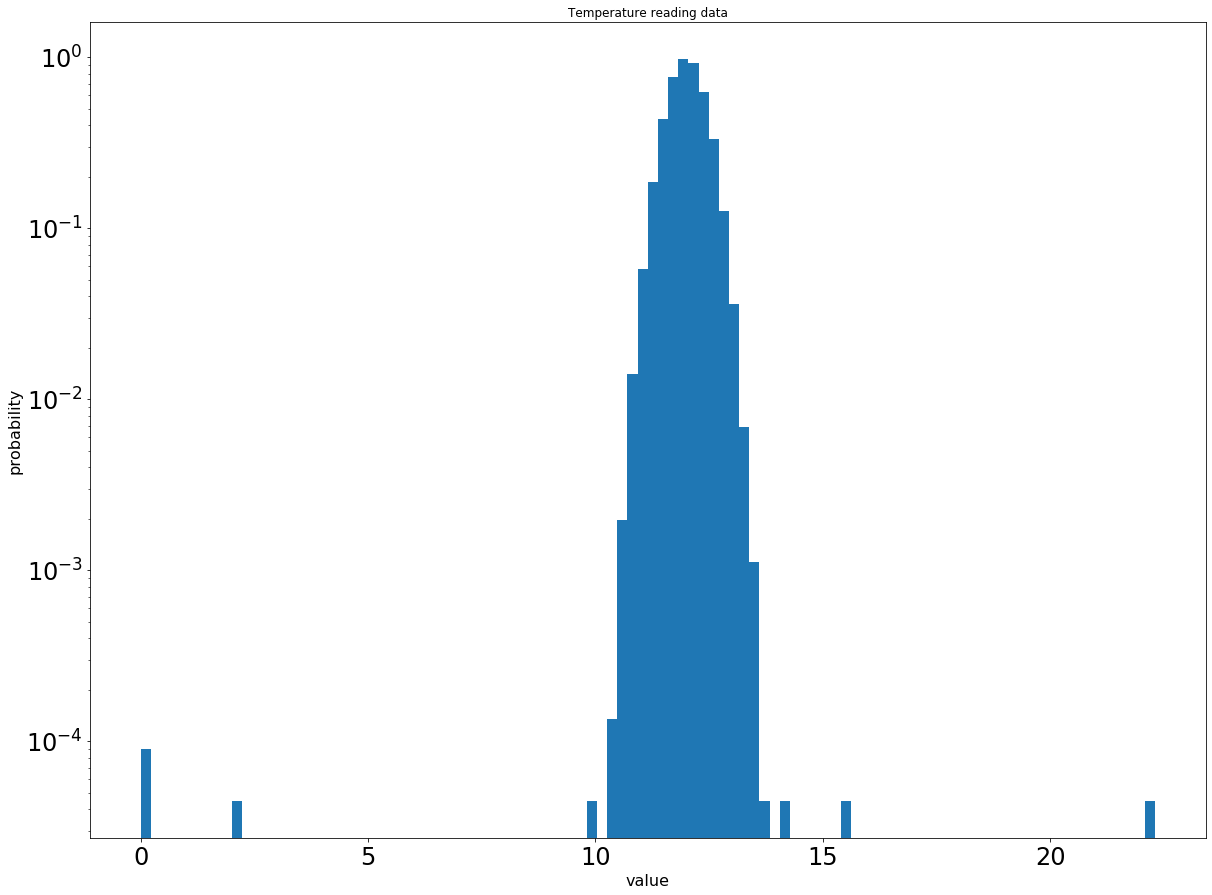

In [12]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
ax.set_xlabel('value', fontsize = 16)
ax.set_ylabel('probability', fontsize = 16)
ax.set_title('Temperature reading data')
plt.show()

$\textbf{A)}$ So our goal is to identify bad data and throw it out.

$\textbf{1.)}$ Start by exploring the data you have created with appropriate plots
    
Below, it is clear that when we take a normal distribution and overlay it on our data with a log scale, there are extraneous data points on the outerlying regions that are in no way at all close to a normal distribution. It is clear they need to be thrown out! Slightly to the left, however, there is also an anomalous 'bad data' point added, but it seems to match our distribution much more closely, so it will be more challenging to make a good filter for data that appears like that.

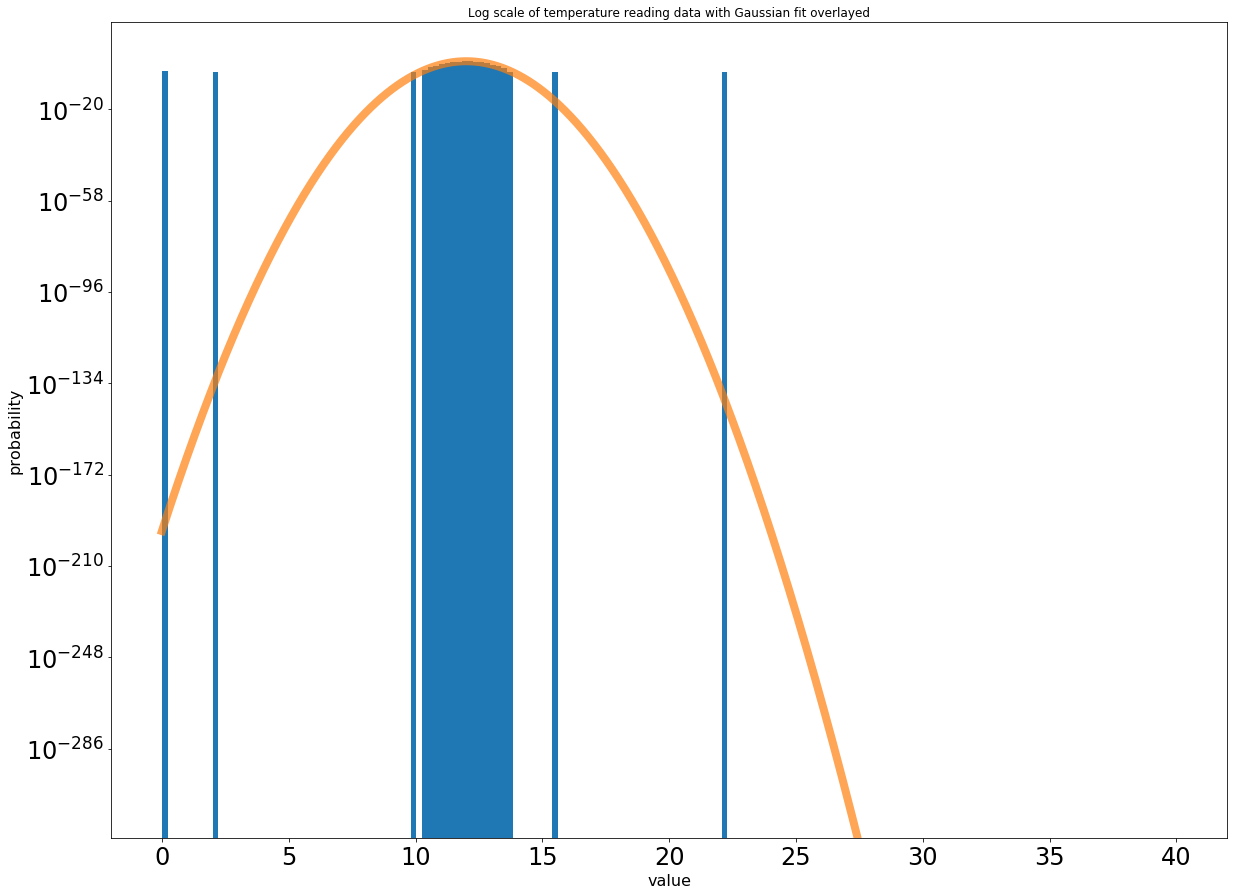

In [17]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.linspace(0,40,10000)
ax.plot(x, stats.norm.pdf(x,loc = 12, scale = 0.4),linewidth = 8,alpha = 0.7)
ax.set_xlabel('value', fontsize = 16)
ax.set_ylabel('probability', fontsize = 16)
ax.set_title('Log scale of temperature reading data with Gaussian fit overlayed')
plt.show()

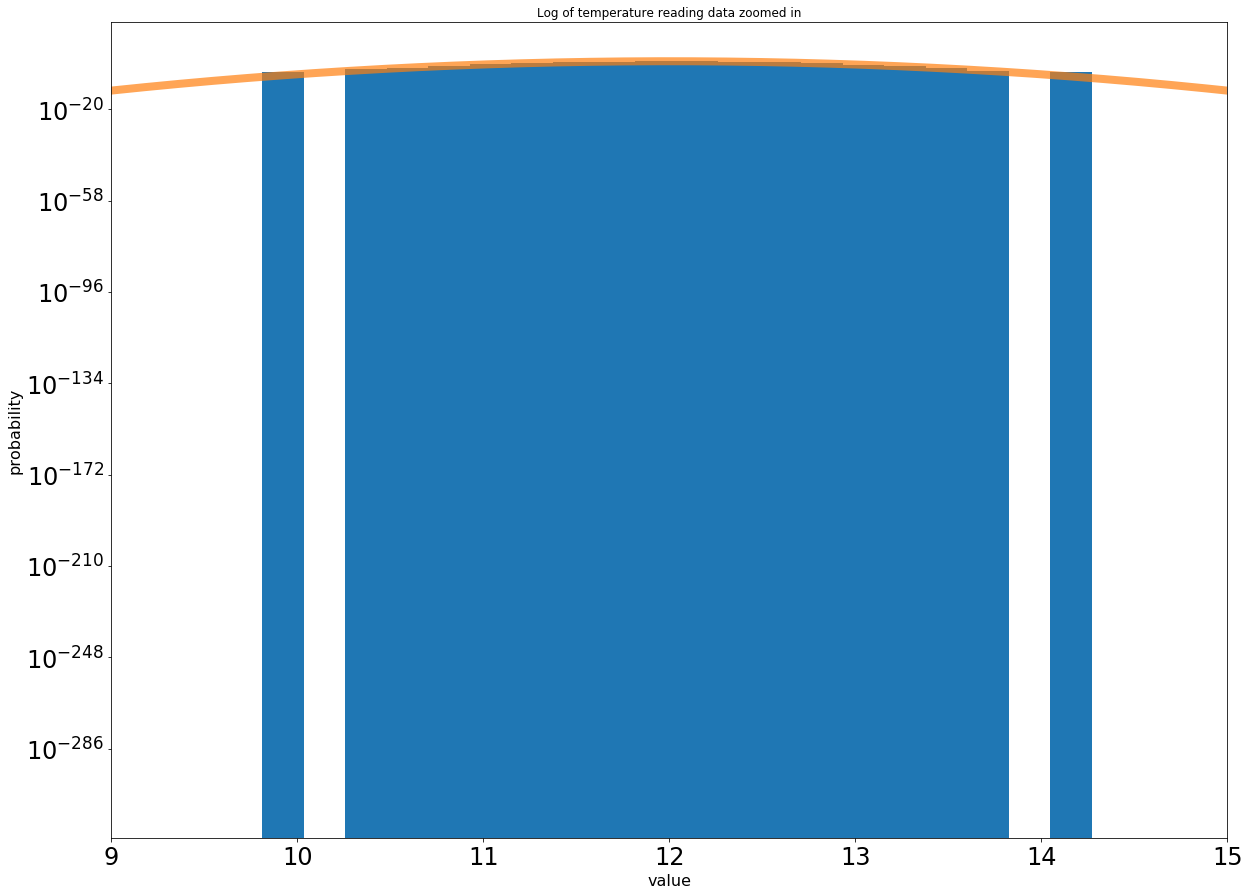

In [20]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.linspace(0,40,10000)
ax.plot(x, stats.norm.pdf(x,loc = 12, scale = 0.4),linewidth = 8,alpha = 0.7)
ax.set_xlim(9, 15)
ax.set_xlabel('value', fontsize = 16)
ax.set_ylabel('probability', fontsize = 16)
ax.set_title('Log of temperature reading data zoomed in')
plt.show()

$\textbf{2.)}$ State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
 
Are the temperature measurements too far from the mean of the expected data to be actual data measurements, or are they anomalous bad data points that need to be thrown out?

To this end, I have arbitrarily decided to make a filter that will simply ignore any data points more than 3 standard deviations from the mean of my expected data. This means that outside of the range of [10.8, 13.2] (since std = 0.4, 3 * 0.4 = 1.2, with mean data ~12), will be thrown out as bad data.

$\textbf{3.)}$ Restate your question in math. Be very clear.
    
Since we know the approximate range of our data, given we know it has a mean of 12 and a precision of ~0.4, any point that is too far away from our mean is likely bad data, and can be thrown out. In this case, the range will be 3 standard deviations, or $12 \pm (0.4 * 3) = 12 \pm 1.2$

$\textbf{4.)}$ Apply your statistical test and construct a truth table.





In [89]:
#from setup, d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
good_count = 0;
bad_count = 0;
bad_data_good_count = 0;
bad_data_bad_count = 0;

array = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
bad_data = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
list_data = np.ndarray.tolist(array)
#bad_list = np.ndarray.tolist(bad_data)

bad_count += sum(map (lambda x : x>13.2, list_data))
bad_count += sum(map (lambda x : x<10.8, list_data))

good_count += sum(map (lambda x : 10.8 <= x <= 13.2, list_data))

bad_data_good_count += sum(map (lambda x : x>13.2, bad_data))
bad_data_good_count += sum(map (lambda x : x<10.8, bad_data))

bad_data_bad_count += sum(map (lambda x : 10.8 <= x <= 13.2, bad_data))

print(bad_count)
print(good_count)
print(bad_data_good_count)
print(bad_data_bad_count)

277
99723
7
1


|                |True T     |    Bad T    |
|----------------|-----------|-------------|
| Your Test Good |  99723    |    7        |
| Your Test Bad  |  277      |    1        |

The idea is how often you kept the known good data (True T & Your Test Good), how often you correctly discarded bad data (Bad T & Your Test Bad), and how often mistakes were made of either omission or commission (off diagonals).

$\textbf{B)}$ How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

The number of omissions is completely dependent on the chosen statistical threshold, in this case, because I simply discarded data outside a specified window. As such, if I had chosen a smaller interval, it would throw out more good data. In order to get an idea of the predictable quantity of omissions, one must simply consider the shape of a Gaussian distribution. We know the mean is 12, and the standard deviation is 0.4. As such, we have a good idea of where the data is distributed, i.e as the cut-off interval gets closer to the mean, the number of 'good data' that gets thrown out by the test will rapidly increase. Since the fringes have much less data points, a filter that cuts off data at distances farther from the mean will have much fewer omissions. In that sense, it is a somewhat predictable quantity, if you have an understanding of how the quantity of values are distributed in a Gaussian distribution.

${\displaystyle {\begin{aligned}\Pr(\mu -1\sigma \leq X\leq \mu +1\sigma )&\approx 0.6827\\\Pr(\mu -2\sigma \leq X\leq \mu +2\sigma )&\approx 0.9545\\\Pr(\mu -3\sigma \leq X\leq \mu +3\sigma )&\approx 0.9973\end{aligned}}}$

The above probabilities shows how much of the distribution lies within a certain range (in terms of the standard deviation) for a standard normal distribution. If we adjust our parameters accordingly, our number of omissions becomes relatively predictable. For example, at 3 standard deviations, approximately $(1 - 0.9973) * 100000 \approx 270$ omissions are expected. We can see that our number in the above case was 277, a relatively close amount.

$\textbf{C)}$ Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Yes, in this case bad data gets in (i.e the 12.7 bad data point, that is within my specified range of [10.8, 13.2]). It could be avoidable if I was strict enough with my range filter, but that would require throwing out a vastly larger amount of good data; a more strict filter causes a rapid increase in the number of good data thrown out due to the shape of the Gaussian distribution, as explained in part b.

$\textbf{Problem 2}$

In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:


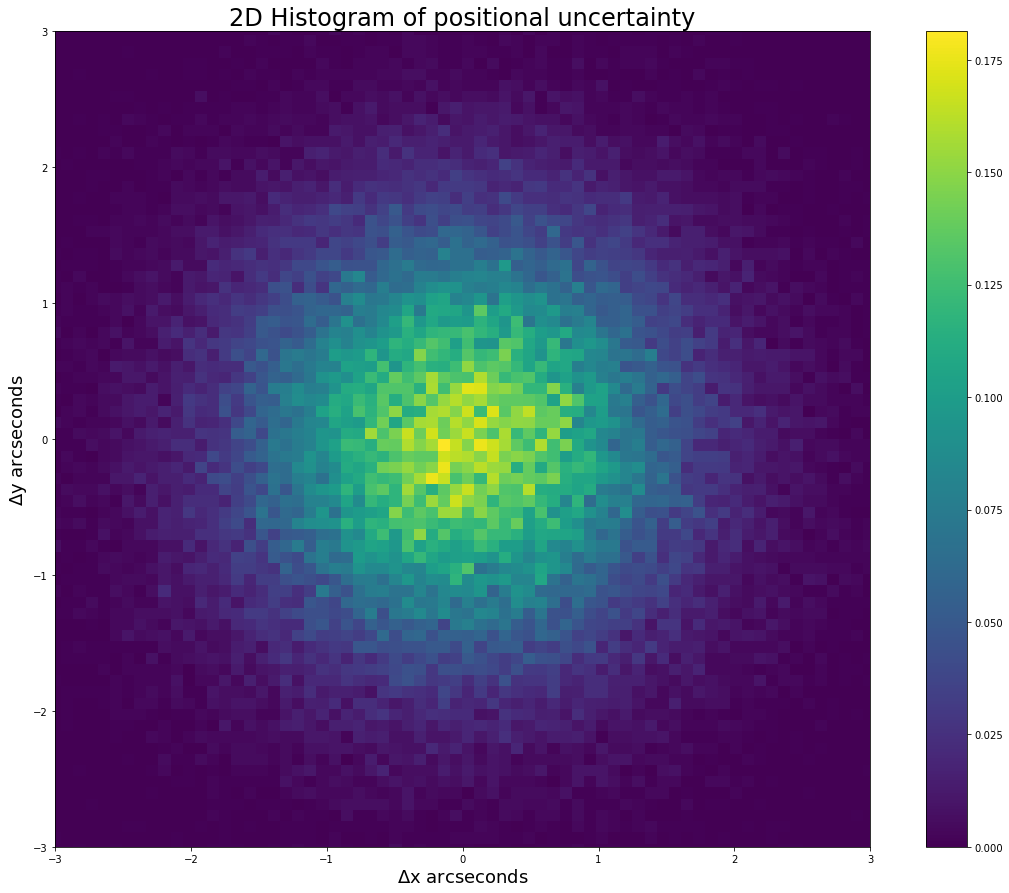

In [5]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

$\textbf{1.)}$ What is the question in words?

What is the minimum distance between successive location measurements, and its associated probability, required for a 5-sigma detection?



In [22]:
prob = 1 - stats.norm.cdf(5)
print("The probability for a 5 sigma detection in a standard normal distribution is " + str(prob))

The probability for a 5 sigma detection in a standard normal distribution is 2.866515719235352e-07


$\textbf{2.)}$ What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.]

As explored in the previous labs, the sum of two independent Gaussian distributions is Gaussian. If $X_1$ and $X_2$ are two independent standard normal variables, then their sum and difference is distributed normally. Their variances are added, but the means are either simply added or subtracted depending on if you are taking a sum or a difference, i.e 

$X_1 + X_2 \Rightarrow \mu = \mu_1 + \mu_2 \Rightarrow \sigma^2 = \sigma_1^2 + \sigma_2^2$

$X_1 - X_2 \Rightarrow \mu = \mu_1 - \mu_2 \Rightarrow \sigma^2 = \sigma_1^2 + \sigma_2^2$

Our above distribution has mean 0 and a variance of 1 arcsecond each. What we are interested in here is the probability density function of the difference between our two Gaussians, a difference multivariate vector. Our new mean is conveniently calculated as $0 + 0 = 0$ - Our new variance however, is slightly different because, as previously explored in class, the euclidian norm $\sqrt{(X_1^2 + X_2^2)}$ between two Gaussian distributions with equal variance follows a Rayleigh distribution with scale factor $\sigma$ equal to the standard deviation related to our original Gaussians by that same square root factor. As such, we expect the probability distribution function representing our two Gaussians to be a Rayleigh distribution with scale parameter $\sigma$ = $\sqrt{(1^2 + 1^2)} = \sqrt{2}$

It then follows that to calculate our 5-sigma threshold distance, we can use a Rayleigh distribution with $\sigma = \sqrt{2}$ 

$\textbf{3.)}$ What distance in arcseconds represents a 5 sigma detection of motion?
    


In [23]:
distance = stats.rayleigh.ppf(1 - prob, 0, np.sqrt(2))
print("The 5-sigma distance is " + str(distance) + " arcseconds")

The 5-sigma distance is 7.762731064215491 arcseconds


As calculated above, the minimum distance between two consecutive images to reach a 5 sigma detection threshold is 7.76 arcseconds. 

$\textbf{Problem 3}$

As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

As always:

$\textbf{1.)}$ What is the question in words?

If we observe 6800 or fewer cosmic rays in the direction of the moon over a period of 8 hours a day for 15 days, and we assume there is an average of about 1 cosmic ray detection per minute, what is the likelihood that our assumption is incorrect, and that we detect less than 1 per minute because the moon is blocking some of the cosmic rays?

$\textbf{2.)}$ Translate the question to math, describing both the expected background pdf() and the integral you need to do.


In [9]:
#15 days, 8 hours, 60 minutes per hour, 1 ray per minute
mean = 15 * 8 * 60 * 1 
prob = stats.poisson.cdf(6800, mean)
print("The probability of a measurement of 6800 or less is " + str(prob))

The probability of a measurement of 6800 or less is 1.0133280183917768e-06


$\textbf{3.)}$ Convert to sigma.
   


In [32]:
z = stats.poisson.ppf(1 - prob, stats.poisson.mean(mean))
sigma = (z - stats.poisson.mean(mean))/(stats.poisson.std(mean))
print("The sigma value associated with that probability is " + str(sigma))

The sigma value associated with that probability is 4.796540999048747


It seems, however, that we got less than a 5 sigma value here. So while it is unlikely to detect 6800 or fewer, it's not quite a high enough sigma value to say the moon is blocking cosmic rays.

$\textbf{4.)}$ There are some unique aspects to this problem. Make sure you explore them in your explanation.

The key unique aspect to this problem is that it is the first time in a lab we're interested in fewer than a specified amount, rather than more than. We look at 6800 rays or fewer, so we don't compute the probability of 1 minus some other probability, but rather just take the probability itself. 